In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
! ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


In [0]:
df_org = pd.read_csv('/content/drive/My Drive/1-Master/Projekte und Ideen/fussball/scraper/df_final.csv', sep=',')

In [0]:
df = df_org.copy()

In [0]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.head()

,competition,saison,gameday,date,home_team_name,guest_team_name,home_coach,home_game_system,home_team_id,guest_coach,guest_game_system,guest_team_id,time,viewers,weekday,day,month,year,home_team_break,guest_team_break,resultNumeric,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,homeTeamGoalsShootAway,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,UEFA Champions League-Qualifikation,2009/10,2.Runde Hinspiele,2009-07-15 20:30:00,Red Bull Salzburg,Bohemian Football Club Dublin,Huub Stevens,4-5-1,409,?,?,9211,20:30,12300,2,15,7,2009,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Europa League Qualifikation,2009/10,2.Runde Hinspiele,2009-07-16 19:15:00,SK Sturm Graz,NK Siroki Brijeg,Franco Foda,4-5-1,122,?,?,1242,19:15,9000,3,16,7,2009,40010,40010,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Europa League Qualifikation,2009/10,2.Runde Hinspiele,2009-07-16 19:15:00,SK Rapid Wien,KF Vllaznia,Peter Pacult,4-4-2 doppel 6,170,?,?,8671,19:15,13000,3,16,7,2009,40010,40010,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bundesliga,2009/10,1,2009-07-17 20:30:00,SC Wiener Neustadt,SK Austria Kärnten,Helmut Kraft,4-4-2,17444,Frenkie Schinkels,4-5-1,11609,20:30,4200,4,17,7,2009,40011,40011,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bundesliga,2009/10,1,2009-07-18 19:30:00,LASK,SV Mattersburg,Matthias Hamann,4-4-2,413,Franz Lederer,4-5-1,856,19:30,5100,5,18,7,2009,40012,40012,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.shape

(2509, 41)

In [0]:
y_reg = df.resultNumeric
y_cat = (pd.get_dummies(np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))))

In [11]:
ndf = df.shape[0]
df = df.drop(['resultNumeric'], axis=1)
df.shape

(2509, 40)

In [12]:
ndf

2509

In [13]:
df.head()

,competition,saison,gameday,date,home_team_name,guest_team_name,home_coach,home_game_system,home_team_id,guest_coach,guest_game_system,guest_team_id,time,viewers,weekday,day,month,year,home_team_break,guest_team_break,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,homeTeamGoalsShootAway,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,UEFA Champions League-Qualifikation,2009/10,2.Runde Hinspiele,2009-07-15 20:30:00,Red Bull Salzburg,Bohemian Football Club Dublin,Huub Stevens,4-5-1,409,?,?,9211,20:30,12300,2,15,7,2009,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Europa League Qualifikation,2009/10,2.Runde Hinspiele,2009-07-16 19:15:00,SK Sturm Graz,NK Siroki Brijeg,Franco Foda,4-5-1,122,?,?,1242,19:15,9000,3,16,7,2009,40010,40010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Europa League Qualifikation,2009/10,2.Runde Hinspiele,2009-07-16 19:15:00,SK Rapid Wien,KF Vllaznia,Peter Pacult,4-4-2 doppel 6,170,?,?,8671,19:15,13000,3,16,7,2009,40010,40010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bundesliga,2009/10,1,2009-07-17 20:30:00,SC Wiener Neustadt,SK Austria Kärnten,Helmut Kraft,4-4-2,17444,Frenkie Schinkels,4-5-1,11609,20:30,4200,4,17,7,2009,40011,40011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bundesliga,2009/10,1,2009-07-18 19:30:00,LASK,SV Mattersburg,Matthias Hamann,4-4-2,413,Franz Lederer,4-5-1,856,19:30,5100,5,18,7,2009,40012,40012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 40 columns):
competition                     2509 non-null object
saison                          2509 non-null object
gameday                         2509 non-null object
date                            2509 non-null object
home_team_name                  2509 non-null object
guest_team_name                 2509 non-null object
home_coach                      2509 non-null object
home_game_system                2509 non-null object
home_team_id                    2509 non-null int64
guest_coach                     2509 non-null object
guest_game_system               2509 non-null object
guest_team_id                   2509 non-null int64
time                            2509 non-null object
viewers                         2509 non-null int64
weekday                         2509 non-null int64
day                             2509 non-null int64
month                           2509 non-null int6

In [0]:
df = df.drop(['date', 'home_team_id', 'guest_team_id'], axis=1)

In [16]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
categorial_variables = df.columns[:15]
categorial_variables = categorial_variables.drop('viewers')
categorial_variables

Index(['competition', 'saison', 'gameday', 'home_team_name', 'guest_team_name',
       'home_coach', 'home_game_system', 'guest_coach', 'guest_game_system',
       'time', 'weekday', 'day', 'month', 'year'],
      dtype='object')

In [0]:
df_cat = pd.get_dummies(df[categorial_variables])
df = pd.concat([df, df_cat], axis=1)
df = df.drop(categorial_variables, axis=1)

In [19]:
df.shape

(2509, 765)

In [20]:
df.head()

,viewers,home_team_break,guest_team_break,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,homeTeamGoalsReceivedAtHome,homeTeamGoalsDiffAtHome,homeTeamGoalsShootAway,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints,competition_2. Liga,competition_Bundesliga,competition_Bundesliga Europa League-Play-off,competition_Europa League,competition_Europa League Qualifikation,competition_Relegation Bundesliga,competition_UEFA Champions League,competition_UEFA Champions League-Qualifikation,competition_ÖFB-Cup,saison_2009/10,saison_2010/11,saison_2011/12,saison_2012/13,saison_2013/14,saison_2014/15,saison_2015/16,saison_2016/17,...,time_-,time_10:30,time_11:00,time_12:00,time_14:00,time_14:30,time_15:00,time_15:30,time_16:00,time_16:15,time_16:30,time_16:45,time_16:50,time_17:00,time_17:15,time_17:30,time_17:45,time_18:00,time_18:15,time_18:30,time_18:45,time_18:55,time_19:00,time_19:10,time_19:15,time_19:30,time_19:45,time_20:00,time_20:15,time_20:20,time_20:25,time_20:30,time_20:35,time_20:45,time_21:00,time_21:05,time_21:15,time_21:45,time_22:15,time_22:30
0,12300,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,9000,40010,40010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13000,40010,40010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4200,40011,40011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5100,40012,40012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Columns: 765 entries, viewers to time_22:30
dtypes: float64(20), int64(3), uint8(742)
memory usage: 2.2 MB


In [0]:
X = df

In [50]:
X.shape, y_reg.shape, y_cat.shape

((2509, 765), (2509,), (2509, 3))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_complete = scaler.transform(X_train)

In [0]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization, Flatten, Dropout
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=4)

In [0]:
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_Classification_acc')

In [30]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(765, 3)

In [31]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


W0814 19:40:48.708562 140170704766848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 19:40:48.745900 140170704766848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 19:40:48.752341 140170704766848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [32]:
model_1.compile(optimizer='adam', loss='mse')

W0814 19:40:54.190914 140170704766848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [33]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

W0814 19:40:58.882705 140170704766848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0814 19:40:58.964518 140170704766848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 2007 samples, validate on 502 samples
Epoch 1/100
2007/2007 [==============================] - 4s 2ms/step - loss: 4.5885 - val_loss: 4.0462
Epoch 2/100
2007/2007 [==============================] - 0s 111us/step - loss: 3.5246 - val_loss: 3.7563
Epoch 3/100
2007/2007 [==============================] - 0s 105us/step - loss: 2.9799 - val_loss: 3.7075
Epoch 4/100
2007/2007 [==============================] - 0s 110us/step - loss: 2.5764 - val_loss: 3.7495
Epoch 5/100
2007/2007 [==============================] - 0s 111us/step - loss: 2.2748 - val_loss: 3.7634
Epoch 6/100
2007/2007 [==============================] - 0s 106us/step - loss: 2.0319 - val_loss: 3.8320
Epoch 7/100
2007/2007 [==============================] - 0s 116us/step - loss: 1.8404 - val_loss: 3.8262
Epoch 8/100
2007/2007 [==============================] - 0s 104us/step - loss: 1.6851 - val_loss: 3.8709
Epoch 9/100
2007/2007 [==============================] - 0s 101us/step - loss: 1.5297 - val_loss: 3.9724
Epoch 10/1

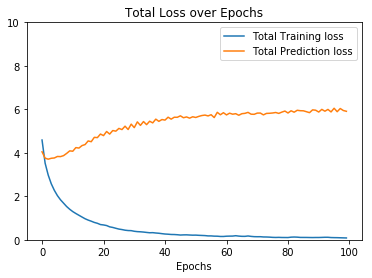

In [34]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 10])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [36]:
rfr = RandomForestRegressor(n_estimators=1000)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8954549833904878

In [0]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

In [55]:
rf_frame = pd.DataFrame()
rf_frame['pred'] = rfr.predict(X_test)
rf_frame['actual'] = y_reg_test.values

rf_frame.to_csv('rf_frame.csv')
rf_frame.head(10)

,pred,actual
0,-0.671,0
1,0.679,5
2,2.453,0
3,-0.063,0
4,-0.981,-1
5,-2.327,-5
6,0.204,-2
7,-1.123,-1
8,0.330,-1
9,0.406,0


35.772229828985964

In [0]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [0]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [0]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 765)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 6128      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [0]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

W0814 12:56:03.081367 140670254184320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2007 samples, validate on 502 samples
Epoch 1/50
2007/2007 [==============================] - 15s 7ms/step - loss: 5.6186 - Regression_loss: 4.5342 - Classification_loss: 1.0844 - Regression_acc: 0.2297 - Classification_acc: 0.4220 - val_loss: 27474.8072 - val_Regression_loss: 27466.2919 - val_Classification_loss: 8.5152 - val_Regression_acc: 0.0060 - val_Classification_acc: 0.2590
Epoch 2/50
2007/2007 [==============================] - 14s 7ms/step - loss: 5.5992 - Regression_loss: 4.5272 - Classification_loss: 1.0720 - Regression_acc: 0.2297 - Classification_acc: 0.4230 - val_loss: 29005.9948 - val_Regression_loss: 28997.1211 - val_Classification_loss: 8.8737 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.2649
Epoch 3/50
2007/2007 [==============================] - 14s 7ms/step - loss: 5.5967 - Regression_loss: 4.5267 - Classification_loss: 1.0700 - Regression_acc: 0.2297 - Classification_acc: 0.4230 - val_loss: 31442.3844 - val_Regression_loss: 31433.0768 - va

In [0]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [0]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [0]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 765)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 765)               585990    
_________________________________________________________________
batch_normalization_3 (Batch (None, 765)               3060      
_________________________________________________________________
hidden_2 (Dense)             (None, 765)               585990    
_________________________________________________________________
Regression (Dense)           (None, 1)                 766       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 1,175,812
Trainable params: 1,174,282
Non-trainable params: 1,530
______________________________________________________________

In [0]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 2007 samples, validate on 502 samples
Epoch 1/100
2007/2007 [==============================] - 13s 7ms/step - loss: 5.6230 - Regression_loss: 4.5368 - Classification_loss: 1.0862 - Regression_acc: 0.2297 - Classification_acc: 0.4225 - val_loss: 177.4609 - val_Regression_loss: 174.9476 - val_Classification_loss: 2.5133 - val_Regression_acc: 0.0498 - val_Classification_acc: 0.3566
Epoch 2/100
2007/2007 [==============================] - 12s 6ms/step - loss: 5.6014 - Regression_loss: 4.5279 - Classification_loss: 1.0735 - Regression_acc: 0.2297 - Classification_acc: 0.4230 - val_loss: 174.4351 - val_Regression_loss: 172.5929 - val_Classification_loss: 1.8423 - val_Regression_acc: 0.0398 - val_Classification_acc: 0.3546
Epoch 3/100
2007/2007 [==============================] - 12s 6ms/step - loss: 5.5970 - Regression_loss: 4.5268 - Classification_loss: 1.0702 - Regression_acc: 0.2297 - Classification_acc: 0.4230 - val_loss: 177.5462 - val_Regression_loss: 175.9859 - val_Classificat

In [0]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(4.6251655, array([0.08681101, 0.09313211, 0.0878168 ], dtype=float32))

In [0]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
hidden_2 = Dense(in_cols*2, activation='relu', name='hidden_2')(hidden_1)
hidden_3 = Dense(in_cols*4, activation='relu', name='hidden_3')(hidden_2)
hidden_4 = Dense(in_cols*4, activation='relu', name='hidden_4')(hidden_3)
output_tensor_reg = Dense(1, name='Regression')(hidden_4)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [0]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [0]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [60]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 765)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 1530)              1171980   
_________________________________________________________________
hidden_2 (Dense)             (None, 1530)              2342430   
_________________________________________________________________
hidden_3 (Dense)             (None, 3060)              4684860   
_________________________________________________________________
hidden_4 (Dense)             (None, 3060)              9366660   
_________________________________________________________________
Regression (Dense)           (None, 1)                 3061      
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total para

In [61]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[model_save],
    verbose=True)

# early_stopping_monitor, 

W0814 20:11:44.513432 140170704766848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2007 samples, validate on 502 samples
Epoch 1/50
2007/2007 [==============================] - 37s 18ms/step - loss: 6.5699 - Regression_loss: 5.4379 - Classification_loss: 1.1321 - Regression_acc: 0.2118 - Classification_acc: 0.4260 - val_loss: 5.3995 - val_Regression_loss: 4.3316 - val_Classification_loss: 1.0679 - val_Regression_acc: 0.2211 - val_Classification_acc: 0.4124
Epoch 2/50
2007/2007 [==============================] - 36s 18ms/step - loss: 6.1829 - Regression_loss: 5.1177 - Classification_loss: 1.0652 - Regression_acc: 0.2247 - Classification_acc: 0.4664 - val_loss: 5.1745 - val_Regression_loss: 4.1223 - val_Classification_loss: 1.0522 - val_Regression_acc: 0.2092 - val_Classification_acc: 0.4402
Epoch 3/50
2007/2007 [==============================] - 36s 18ms/step - loss: 5.3516 - Regression_loss: 4.3147 - Classification_loss: 1.0369 - Regression_acc: 0.2312 - Classification_acc: 0.5182 - val_loss: 4.9667 - val_Regression_loss: 3.9261 - val_Classification_loss: 1.

In [79]:
pd.DataFrame(model_4.predict(X_test)[0])

,0
0,-3365.421143
1,9.662407
2,50.956795
3,10.555014
4,3.175745
5,-3162.928711
6,15.499386
7,18.208521
8,69.861244
9,22.932871


In [81]:
nn4_frame = pd.DataFrame(model_4.predict(X_test)[0])
#nn4_frame['pred'] = pd.DataFrame(model_4.predict(X_test)[0])
nn4_frame['actual'] = y_reg_test.values

nn4_frame.to_csv('nn4_frame.csv')
nn4_frame.head(10)

,0,actual
0,-3365.421143,0
1,9.662407,5
2,50.956795,0
3,10.555014,0
4,3.175745,-1
5,-3162.928711,-5
6,15.499386,-2
7,18.208521,-1
8,69.861244,-1
9,22.932871,0


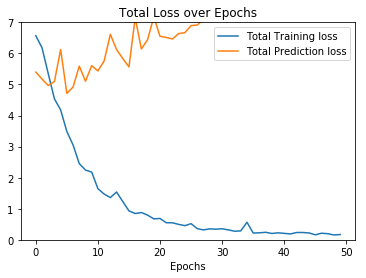

In [63]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

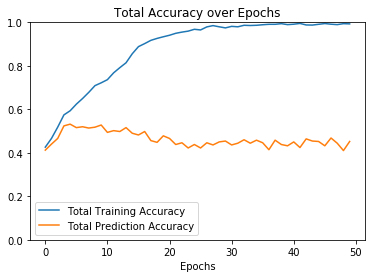

In [64]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])

In [0]:
model_4_prediction = pd.DataFrame(model_4.predict(X_test_scaled)[1])
model_4_prediction.columns = ['draw', 'lost', 'won']

In [0]:
model_4_prediction.head()

,draw,lost,won
0,0.305283,0.360322,0.431724
1,0.195627,0.054826,0.772555
2,0.271716,0.230964,0.534820
3,0.302910,0.350451,0.438702
4,0.352718,0.562855,0.305876


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix([np.argmax(x) for x in y_class_test.values], [np.argmax(x) for x in model_4_prediction.values])
cm

array([[  0,  33,  77],
       [  0, 103,  83],
       [  0,  52, 154]])

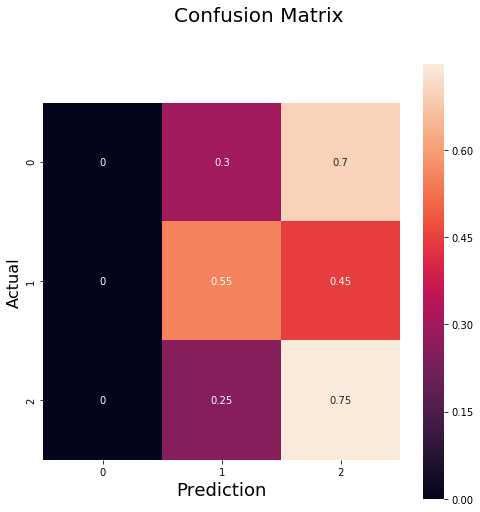

In [0]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cm = confusion_matrix([np.argmax(x) for x in y_class_test.values], [np.argmax(x) for x in model_4_prediction.values])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, ax = ax, annot=True, square=True)
fig.suptitle('Confusion Matrix', fontsize=20)
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.show()


#### michi code
def pretty_confusion(target, prediction):
    """Prettify the on-board confusion matrix of sklearn."""
    
    cmc = ["Condition positive", "Condition negative"]
    cmi = ["Predicted condition positive", "Predicted condition negative"]
    
    matrix = confusion_matrix(target, prediction)
    cm = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return pd.DataFrame(cm , columns=cmc, index=cmi)

In [0]:
cm

array([[0.        , 0.3       , 0.7       ],
       [0.        , 0.55376344, 0.44623656],
       [0.        , 0.25242718, 0.74757282]])

In [0]:
input_tensor = Input(shape=(in_cols,))

hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols*2, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
dropout_1 = Dropout(0.2)(batch_2)

hidden_3 = Dense(in_cols*4, activation='relu', name='hidden_3')(dropout_1)
batch_3 = BatchNormalization()(hidden_3)
hidden_4 = Dense(in_cols*4, activation='relu', name='hidden_4')(batch_3)
batch_4 = BatchNormalization()(hidden_4)
dropout_2 = Dropout(0.3)(batch_4)

hidden_5 = Dense(in_cols*8, activation='relu', name='hidden_5')(dropout_2)
batch_5 = BatchNormalization()(hidden_5)
hidden_6 = Dense(in_cols*8, activation='relu', name='hidden_6')(batch_5)
batch_6 = BatchNormalization()(hidden_6)
dropout_3 = Dropout(0.4)(batch_6)

output_tensor_reg = Dense(1, name='Regression')(dropout_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [0]:
model_5 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [0]:
model_5.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 765)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 1530)              1171980   
_________________________________________________________________
batch_normalization_57 (Batc (None, 1530)              6120      
_________________________________________________________________
hidden_2 (Dense)             (None, 1530)              2342430   
_________________________________________________________________
batch_normalization_58 (Batc (None, 1530)              6120      
_________________________________________________________________
dropout_13 (Dropout)         (None, 1530)              0         
_________________________________________________________________
hidden_3 (Dense)             (None, 3060)              4684860   
__________

In [0]:
model_5_training = model_5.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor, model_save],
    verbose=True)

Train on 2007 samples, validate on 502 samples
Epoch 1/50
2007/2007 [==============================] - 137s 68ms/step - loss: 5.6833 - Regression_loss: 4.5925 - Classification_loss: 1.0908 - Regression_acc: 0.2237 - Classification_acc: 0.3787 - val_loss: 9912707800375590.0000 - val_Regression_loss: 9912707800375590.0000 - val_Classification_loss: 9.5053 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.4084
Epoch 2/50
2007/2007 [==============================] - 131s 65ms/step - loss: 5.7051 - Regression_loss: 4.6312 - Classification_loss: 1.0739 - Regression_acc: 0.2152 - Classification_acc: 0.4180 - val_loss: 14266236921825516.0000 - val_Regression_loss: 14266236921825516.0000 - val_Classification_loss: 6.3763 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.2211
Epoch 3/50
2007/2007 [==============================] - 131s 65ms/step - loss: 5.6978 - Regression_loss: 4.6257 - Classification_loss: 1.0721 - Regression_acc: 0.2113 - Classification_acc: 0.4220 - val

In [0]:
model_4